<center><h1>Understanding Color Distribution of Azerbaijani Carpets</h1> </center>


# Exploring Azerbaijani Carpets

<div class="alert alert-block alert-success">
 "Where my carpet is, there is my house" is an Azerbaijani proverb showing the importance of carpets in the lives of Azerbaijanis.  
</div>





## Exploratory question

After gathering, exploring and cleaning our carpet data, we're going to answer the following questions:

<center><h2> What are the dominant colors used in carpet creation in each region of Azerbaijan based on the image processing of dataset for each region?</h2></center>


In general, I am using GitHub as a public repository to follow the process of creating my overall capstone project where all of my data gathering, cleaning and experiments will live. Here is the link to the repository: https://github.com/hamidliii/capstone-azerbaijani-carpets

# Detecting and removing black background color from the dataset

I aim in this project to get a deeper understanding of the color distributions of each region.  

As we saw in the last part of this project, while most color distributions were as expected, the color black was a lot more prevalent. Hence, in this part, we will detect and remove the black background from our dataset to receive more accurate results. 

## Breakdown of the project
In this project, we will 

1) Detect and remove the black background color from the image dataset

2) Create data visualization of the distribution of colors after the removal of the black color 

3) Create comparative data visualizations for color distribution in each region with and without the black background.





# Methods used

We will use the OpenCV library again to manipulate pixels to remove the black background. I follow this [tutorial](https://www.geeksforgeeks.org/removing-black-background-and-make-transparent-using-python-opencv/).

We will specifically work with **cv2.cvtColor** method, which can convert an image from one color space to another. This method will specify our image set as **image source** to work with and the **code** of color space conversion. 

We will read each image and convert it into a grayscale. Then, we will apply a set threshold to convert an image from a grayscale into a binary one, i.e., simply black and white. We use thresholding to select the black background of an image while ignoring the parts we are not concerned with. So, if the pixel value is smaller than the threshold, it is set to 0. Otherwise, it is set to a maximum value.

For the threshold, I am using **cv2.threshold()** method. 

1) The first argument is the source grayscale image. 

2) The second argument is the threshold value used to classify the pixel values. Based on trial and error, I picked a simple thresholding value of 10, which worked best for my dataset. 

3) The third argument is the maximum value assigned to pixel values exceeding the threshold. 

4) OpenCV provides different types of thresholding, which is given by the function's fourth parameter. I chose basic thresholding, cv.THRESH_BINARY, as it achieves my desired goal. 

## Showcasing example images of carpets with black background

As most images contain black backgrounds, I will showcase examples of such images from each region. 

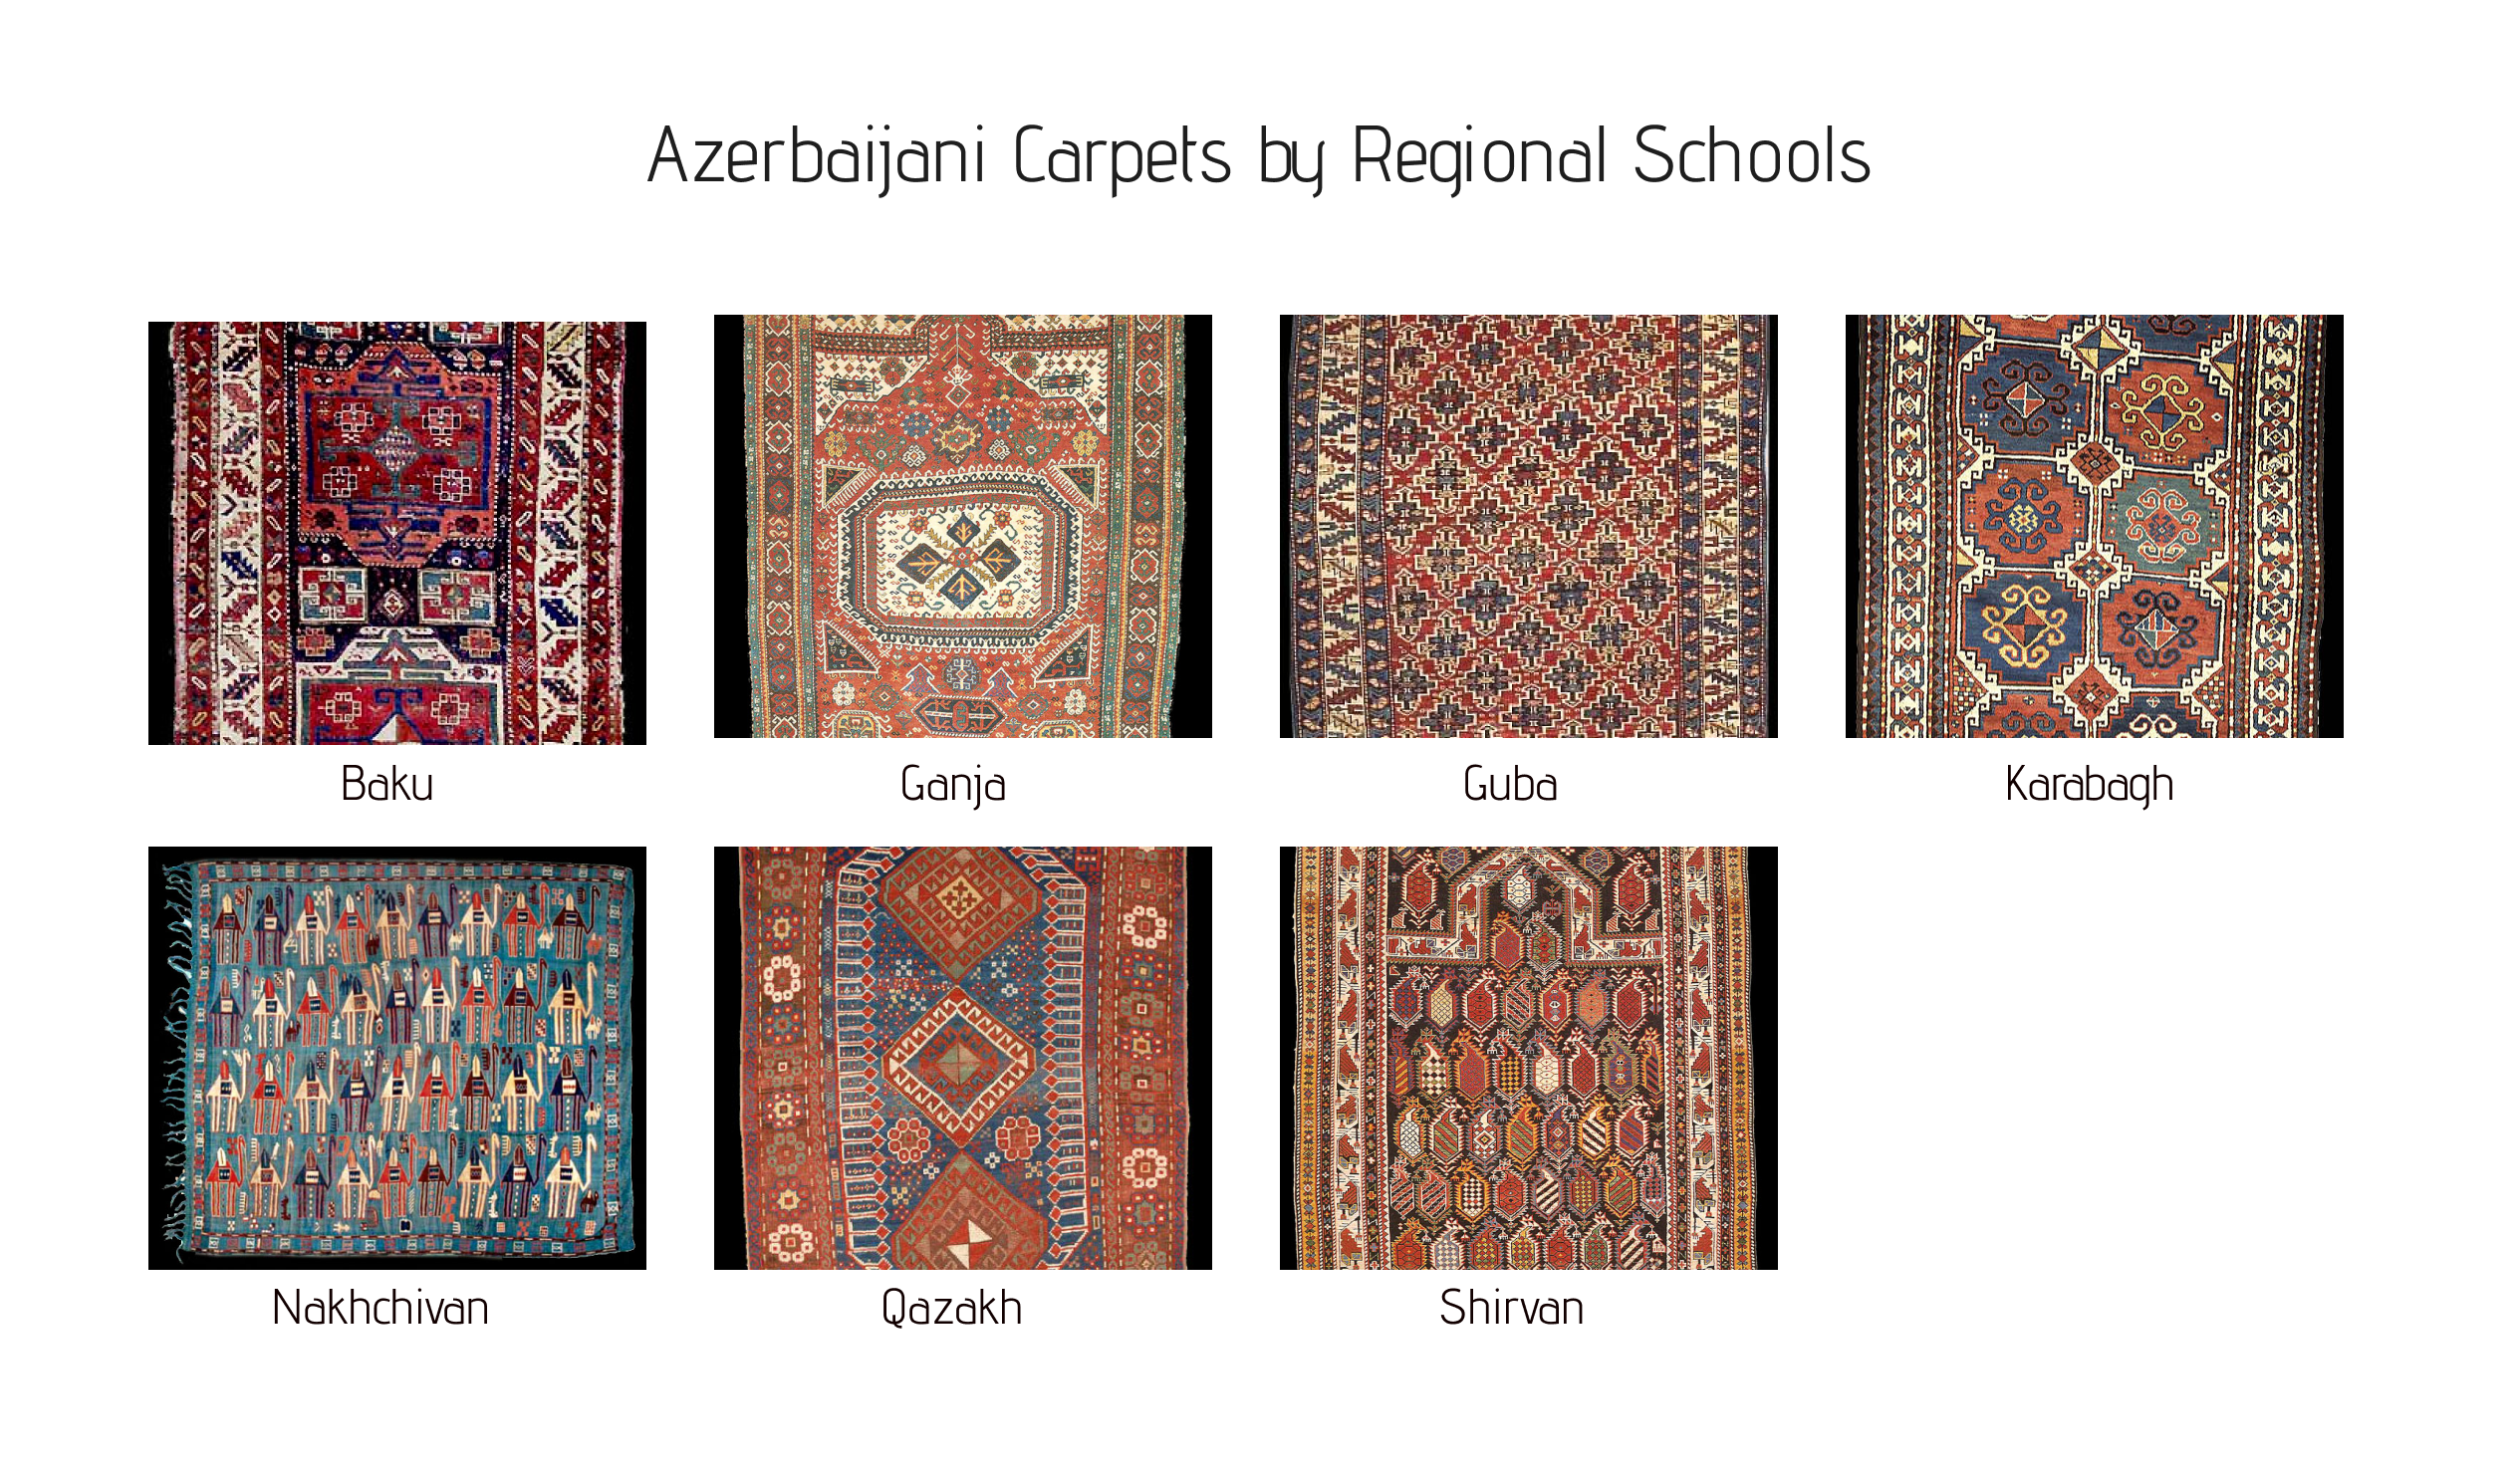

As we can see, the background of those images is black, and as our model spits out a color based on the color clusters, it classifies this black background together with the other shades of black used as dyes on the carpets. Hence, we will remove the black background and make it transparent to create a more accurate color distribution. 

In [1]:
# importing needed libraries 

from glob import glob 
from PIL import Image
import requests
import os
import numpy as np
import pandas as pd
from zipfile import ZipFile
import re
import cv2
from sklearn.cluster import KMeans, MiniBatchKMeans
from math import sqrt
from collections import Counter

/Users/nina/anaconda3/lib/python3.7/site-packages/requests/__init__.py:91: RequestsDependencyWarning: urllib3 (1.26.9) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)


In [31]:
# Import the library OpenCV
import cv2
import glob

def remove_black_background(src_path, output_path ):
    for i, file in enumerate(glob.glob(src_path), 1):
        # Read the image
        src = cv2.imread(file, 1)

        # Convert image to image gray
        tmp = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)

        # Applying thresholding technique
        _, alpha = cv2.threshold(tmp, 10, 255, cv2.THRESH_BINARY)

        # Using cv2.split() to split channels 
        # of coloured image
        b, g, r = cv2.split(src)

        # Making list of Red, Green, Blue
        # Channels and alpha
        rgba = [b, g, r, alpha]

        # Using cv2.merge() to merge rgba
        # into a coloured/multi-channeled image
        dst = cv2.merge(rgba, 4)

        # Writing and saving to a new image
        cv2.imwrite(os.path.join(output_path, 'bckg_removed_{}.png'.format(i)), dst)
        

In [ ]:
#Ganja
remove_black_background("azerbaijani_carpets/Baku/*.jpg", "azerbaijani_carpets_bck_removed/Baku/")

#Ganja
remove_black_background("azerbaijani_carpets/Ganja/*.jpg", "azerbaijani_carpets_bck_removed/Ganja/")

#Guba
remove_black_background("azerbaijani_carpets/Guba/*.jpg", "azerbaijani_carpets_bck_removed/Guba/")

#Karabagh
remove_black_background("azerbaijani_carpets/Karabagh/*.jpg", "azerbaijani_carpets_bck_removed/Karabagh/")

#Nakhchivan
remove_black_background("azerbaijani_carpets/Nakhchivan/*.jpg", "azerbaijani_carpets_bck_removed/Nakhchivan/")

#Shirvan
remove_black_background("azerbaijani_carpets/Shirvan/*.jpg", "azerbaijani_carpets_bck_removed/Shirvan/")

#Qazax
remove_black_background("azerbaijani_carpets/Qazax/*.jpg", "azerbaijani_carpets_bck_removed/Qazax/")



# All the data
I have saved all the images in a new local azerbaijani_carpets_bck_removed folder, which is further divided into region folder which are divided into pattern/city folders. 

In [39]:
# showing thee folders under azerbaijani_carpets
for i in os.listdir('./azerbaijani_carpets_bck_removed'):
    if i != '.DS_Store':
        print(i)

Shirvan
Ganja
Baku
Nakhchivan
Guba
Karabagh
Qazax


# Showcase examples of manipulated images

After our pixel manipulation, I checked a few examples, and it looks promising. As we have 4500+ images, it will take a while to check if I manually removed all background noise. So, I will showcase an example of the final result here.

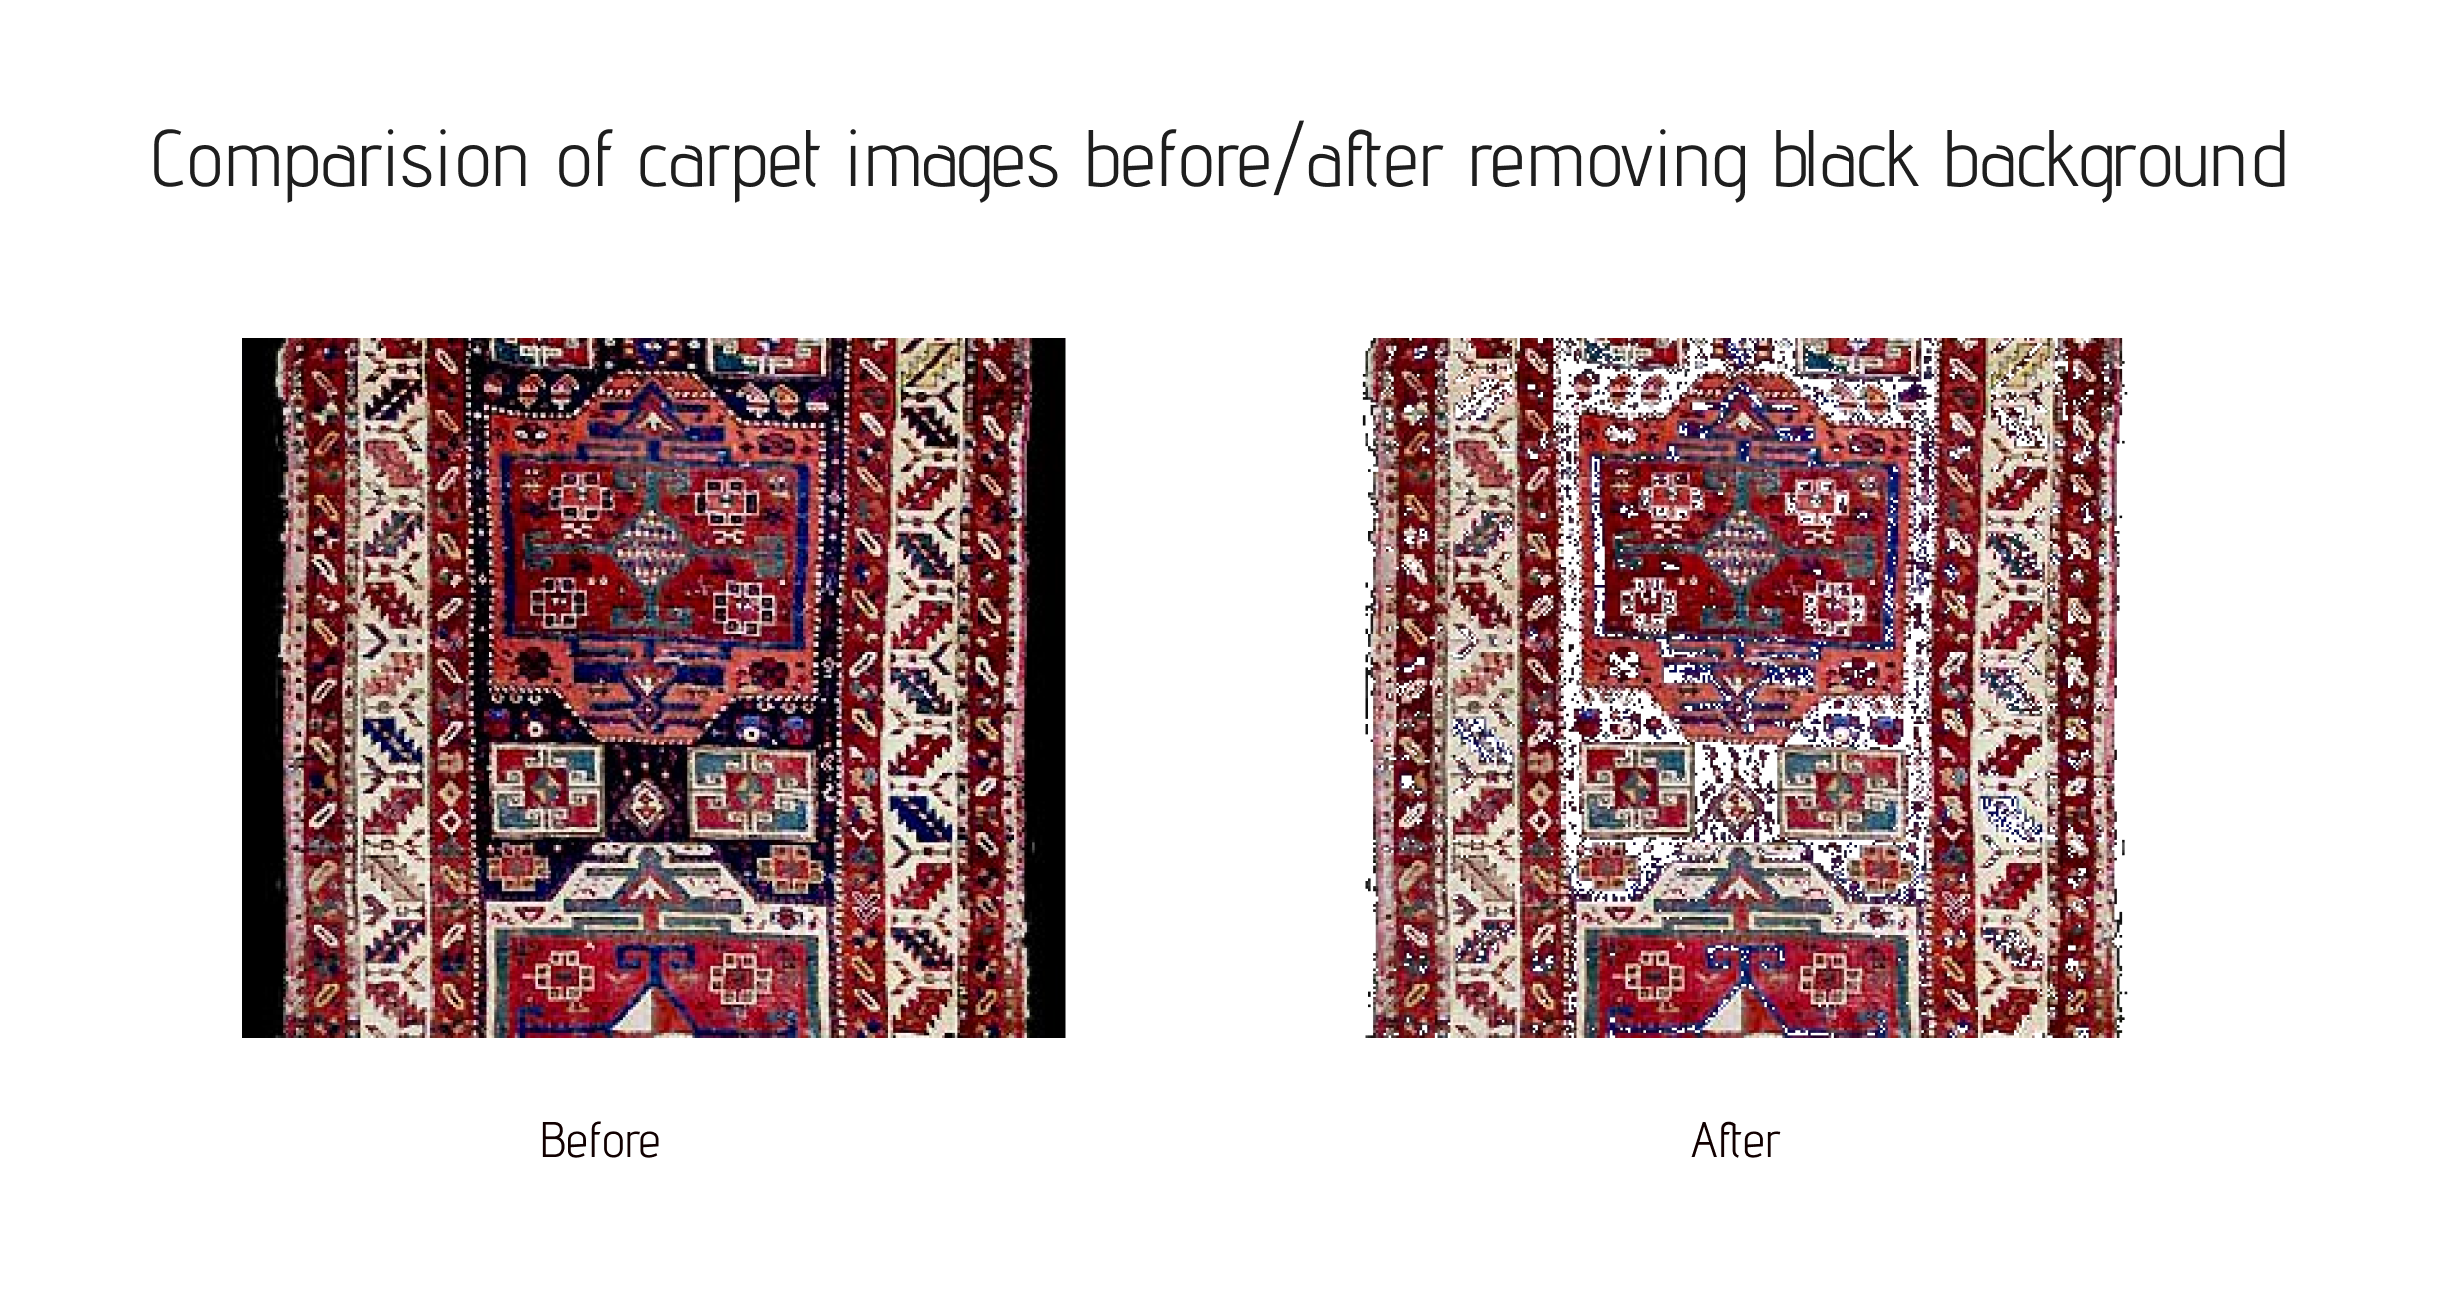

To check my lengthy analysis and verification, you can refer [here](https://github.com/hamidliii/capstone-azerbaijani-carpets). 


# Creating the image / region dataset with cleaned images


I will create a dataset of all image names and their corresponding region to simplify the data manipulation. I am dividing them by central regions as I want to find the predominant colors of each region.

In [62]:
# Importing the necessary libraries

import os
import pandas as pd

# a placeholder to add all image names and associated folder name  
data = []

carpetdir = 'azerbaijani_carpets_bck_removed/'

for root, dirc, files in os.walk(carpetdir):
    for file in files:
        if ".png" in file:
            data.append((os.path.join(file), root.split('/')[-1]))

carpets_df = pd.DataFrame(data, columns = ['File_Name','Carpet_Region'])


In [63]:
carpets_df.head()

File_Name Carpet_Region
0  bckg_removed_498.png       Shirvan
1  bckg_removed_329.png       Shirvan
2  bckg_removed_473.png       Shirvan
3  bckg_removed_315.png       Shirvan
4  bckg_removed_301.png       Shirvan

## Number of images in each region's folder.


In [64]:
carpets_df.groupby('Carpet_Region').count()

File_Name
Carpet_Region           
Baku                 162
Ganja                 62
Guba                2310
Karabagh             351
Nakhchivan            34
Qazax               1007
Shirvan              885

## Basic statistics about our dataset

In [65]:
carpets_df.groupby('Carpet_Region').count().describe()


File_Name
count     7.000000
mean    687.285714
std     814.584498
min      34.000000
25%     112.000000
50%     351.000000
75%     946.000000
max    2310.000000

As we can see, our regional image data distribution is unbalanced, with the smallest region by image count having 34 images, while the biggest has 2310 images. 

## Saving dataset as cvs file


In [66]:
carpets_df.to_csv('az_carpets_by_region_without_background.csv')

# Data Sampling
Similar to previous assignment, I will use full dataset instead of sampling.

In [67]:
def sample_data(info, sample_size=50, groupby='Carpet_Region'):
    '''
        Sampling procedure
    ''' 
    def sample_func(x):
        # sample 10% of while dataset if smaple size is set to < 1
        if sample_size < 1: 
            subsample_size = round(0.1*len(x))
        else:
            # sample each region by given sample size or the size of full set 
            subsample_size = len(x) if len(x) < sample_size else sample_size
        return list(x.sample(subsample_size, random_state=1))
    
    sample = info.groupby(groupby).agg({
        'File_Name': sample_func
    }).to_dict()
    
    return sample['File_Name']

In [68]:
# Picking different sampling sizes to experiment  
# Sample size is set to the biggets region size in our dataset
sample_carpets_all = sample_data(carpets_df, sample_size=2310, groupby='Carpet_Region')

# Detect 10 prevalent colors in samples & create visualization data

For writing my code to extract the dominant colours and visualize them, I advised this [tutorial](https://www.kaggle.com/code/d22ski/the-painting-art-colors-timeline) and adjusted it to my dataset. 

I have used OpenCV2 for image manipulation, applied KMeans, a machine learning algorithm, to identify and extract the primary colors and then plotted the information using the Altair library of Python. I picked KMeans algorithms because it is the simplest yet most comprehensive way to deal with colors. As we can't extract a specific color as each pixel would represent a different color, we use an algorithm to cluster pixels based on their distance in 3D space defined by their R, G, B color components. Hence, I will cluster pixels into 10 groups representing the 10 most dominant colors. 

Overall, I follow the steps: 

- Grouped the dataset by regions;
- Within every region, images were resized to a fixed dimension and combined into a single image as an array of pixel's RGB components;
- K-Means clustering (k=10) was applied over this array, producing clusters of the 10 most prevalent colors; 
- For each color cluster the pixels arranged to this cluster (color) were counted, giving the size of each cluster;
- The resulting clustering information (colors and size of color clusters for each region) was used to create the final visualization of the colors distribution in each region.

In [80]:
import glob
from PIL import Image

# Load and resize images
def load_img(filename):
    for file in glob.glob('azerbaijani_carpets_bck_removed/**/*.png'): 
        if filename == file.split('/')[-1]:
            image = cv2.imread(file)
            try:
                img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            except cv2.error as e:
                print('Failed to load:', filename)
                return None
    return img

def resize_img(img):
    h, w, _ = img.shape
    w_new = int(200 * w / max(w, h))
    h_new = int(200 * h / max(w, h))
    
    return cv2.resize(img, (w_new, h_new), interpolation = cv2.INTER_AREA)

In [81]:
# COLORS CONVERSION
def rgb_to_hex(rgb):
    return "#{:02x}{:02x}{:02x}".format(int(rgb[0]), int(rgb[1]), int(rgb[2]))

def rgb_to_hsp(rgb):
    """
    Calculates RGB color brightness
    """
    return sqrt(0.299 * (rgb[0]**2) + 0.587 * (rgb[1]**2) + 0.114 * (rgb[2]**2))

In [82]:
# PREVALENT COLORS DETECTION WITH K-Means
def detect_prevalent_colors(files, group_label, colors_num):
    """
    Detect N-most prevalent colors in the list of given image files
    
    Params:
    files: list of filenames
    group_label: label of group as tuple of variable and string
    colors_num: N most prevalent colors to detect 
    """
    data = []
    for f in files:
        img = load_img(f)
        if img is not None:
            mod_img = resize_img(img)
            mod_img = mod_img.reshape(mod_img.shape[0] * mod_img.shape[1], 3).astype('float32')
            data.append(mod_img)
        
    data = np.concatenate(data, axis=0)
    
    clustering_method = MiniBatchKMeans # KMeans or MiniBatchKMeans
    
    clf = clustering_method(n_clusters = colors_num)
    labels = clf.fit_predict(data)
    cluster_centers = clf.cluster_centers_
    
    counts = Counter(labels)
    counts_sum = sum(counts.values())
    
    colors_data = [
        {
            'hex': rgb_to_hex( cluster_centers[i]),
            'hsp': rgb_to_hsp(cluster_centers[i]),
            'prop': (counts[i] / counts_sum),
            group_label[0]: group_label[1]
        } for i in counts.keys()
    ]
    
    return colors_data

###  Sample size is all images in the given region



In [83]:
# RUN
viz_colors_all = []
for region, files in sample_carpets_all.items():
    print('Processing region:', region)
    
    region_colors = detect_prevalent_colors(files, ('region', region), colors_num=10)
    
    # Sort colors by brightness
    viz_colors_all.extend(
        sorted(region_colors, key=lambda x: x['hsp'])
    )

Processing region: Baku
Processing region: Ganja
Processing region: Guba
Processing region: Karabagh
Processing region: Nakhchivan
Processing region: Qazax
Processing region: Shirvan


# Prepare & Plot colors timelines visualization

In [84]:
viz_df_all = pd.DataFrame(viz_colors_all)
viz_df_all.head(15)

hex         hsp      prop region
0   #040302    3.680000  0.117963   Baku
1   #372a2b   47.014339  0.102577   Baku
2   #743328   76.471194  0.113649   Baku
3   #504d50   78.735628  0.101020   Baku
4   #815b48  102.556980  0.158386   Baku
5   #af4332  110.186918  0.080240   Baku
6   #928071  132.499314  0.101596   Baku
7   #b77f4e  142.422990  0.101673   Baku
8   #c7aa86  176.261814  0.089191   Baku
9   #e9dfc7  223.701591  0.033706   Baku
10  #040401    3.939452  0.122843  Ganja
11  #332f33   49.341495  0.113004  Ganja
12  #663028   68.828894  0.112356  Ganja
13  #4e595e   86.968456  0.078961  Ganja
14  #7a5242   94.749024  0.136179  Ganja

# Visualize with color proportions


In [87]:
import altair as alt

alt.Chart(viz_df_all, title='Prevalent colors in Azerbaijani Carpets by Caprpet School Regions').mark_bar(size=100).encode(
    alt.X(
        'region',
        axis=alt.Axis(
            title='Region of Azerbaijan'
        )
    ),
    alt.Y(
        'sum(prop)',
        scale=alt.Scale(domain=(0,1)),
        axis=alt.Axis(
            title='Prevalent color proportions'
        )
    ),
    
    color=alt.Color(
        'hex',
        scale=None,
        legend=None
    ),
    order=alt.Order(
        'hsp',
        sort='ascending'
    ),
    tooltip=['region', 'hex', 'prop']
).properties(
    width=900,
    height=500
)

alt.Chart(...)

# The color "gamut" of Azerbaijani carpets

In [86]:
# RUN
viz_colors_all_20_clusters = []
for region, files in sample_carpets_all.items():
    print('Processing region:', region)
    
    region_colors = detect_prevalent_colors(files, ('region', region), colors_num=20)
    
    # Sort colors by brightness
    viz_colors_all_20_clusters.extend(
        sorted(region_colors, key=lambda x: x['hsp'])
    )

Processing region: Baku
Processing region: Ganja
Processing region: Guba
Processing region: Karabagh
Processing region: Nakhchivan
Processing region: Qazax
Processing region: Shirvan


In [88]:
viz_df_all_20_clusters = pd.DataFrame(viz_colors_all_20_clusters)
viz_df_all_20_clusters.head(15)

hex         hsp      prop region
0   #020201    2.640994  0.111813   Baku
1   #2b2021   36.027017  0.053841   Baku
2   #3e3739   58.111282  0.059586   Baku
3   #633429   68.765679  0.074151   Baku
4   #42505b   77.738064  0.032914   Baku
5   #902b22   86.561867  0.047434   Baku
6   #685146   87.769828  0.081309   Baku
7   #8b4e39   98.791617  0.076938   Baku
8   #696f72  110.237684  0.029267   Baku
9   #866653  111.325711  0.070065   Baku
10  #bd4534  117.694287  0.041850   Baku
11  #a66b4c  125.811983  0.054794   Baku
12  #987f69  133.058924  0.057131   Baku
13  #c07f40  145.163311  0.031992   Baku
14  #a49787  153.794104  0.033113   Baku

In [89]:
import altair as alt

alt.Chart(viz_df_all_20_clusters, title='Prevalent colors in Azerbaijani Carpets by Caprpet School Regions').mark_bar(size=100).encode(
    alt.X(
        'region',
        axis=alt.Axis(
            title='Region of Azerbaijan'
        )
    ),
    alt.Y(
        'sum(prop)',
        scale=alt.Scale(domain=(0,1)),
        axis=alt.Axis(
            title='Prevalent color proportions'
        )
    ),
    
    color=alt.Color(
        'hex',
        scale=None,
        legend=None
    ),
    order=alt.Order(
        'hsp',
        sort='ascending'
    ),
    tooltip=['region', 'hex', 'prop']
).properties(
    width=900,
    height=500
)

alt.Chart(...)

# Comparing results of before/after removing black background

## Top 10-prevalent colors comparsions
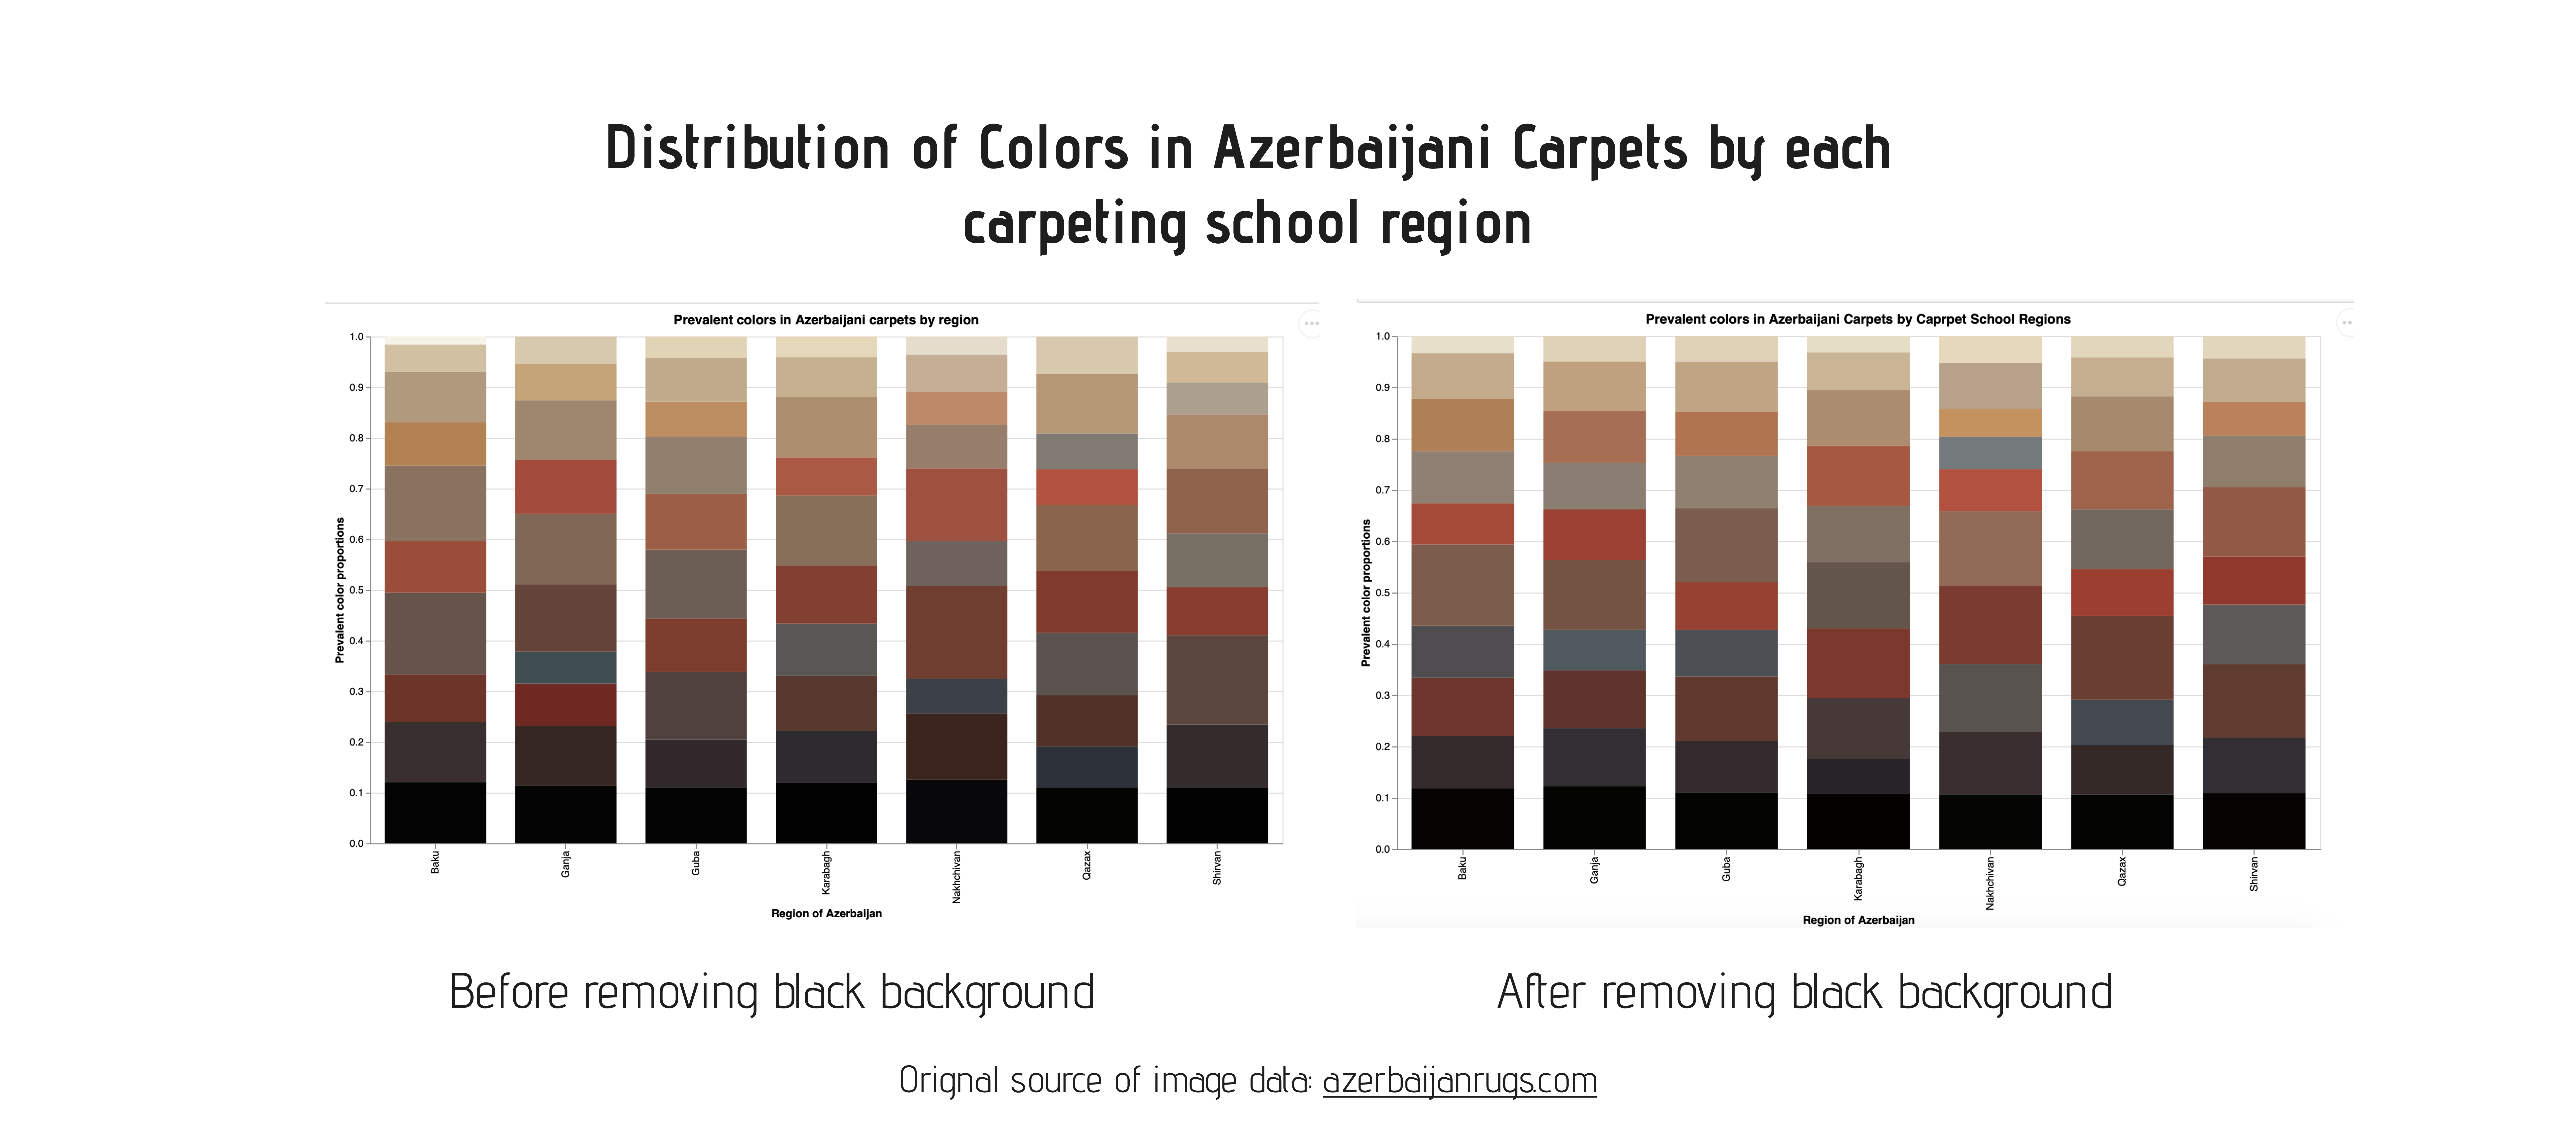

As we can see, removing the background color resulted in obtaining more shades of grey/blue. To extract the colors, the model I'm using is clustering colors based on the nearest pixel values. Hence, after entirely removing the background color, the value of the black pixel didn't affect nearby darker shades anymore, so more colours were revealed. However, as we can see darkest (closest to black) is still pretty big in proportion to other colors. Still, we can fully assume this color is responsible for the countering dye of the carpet rather than the background color. 

## Top 20-prevalent colors comparsions
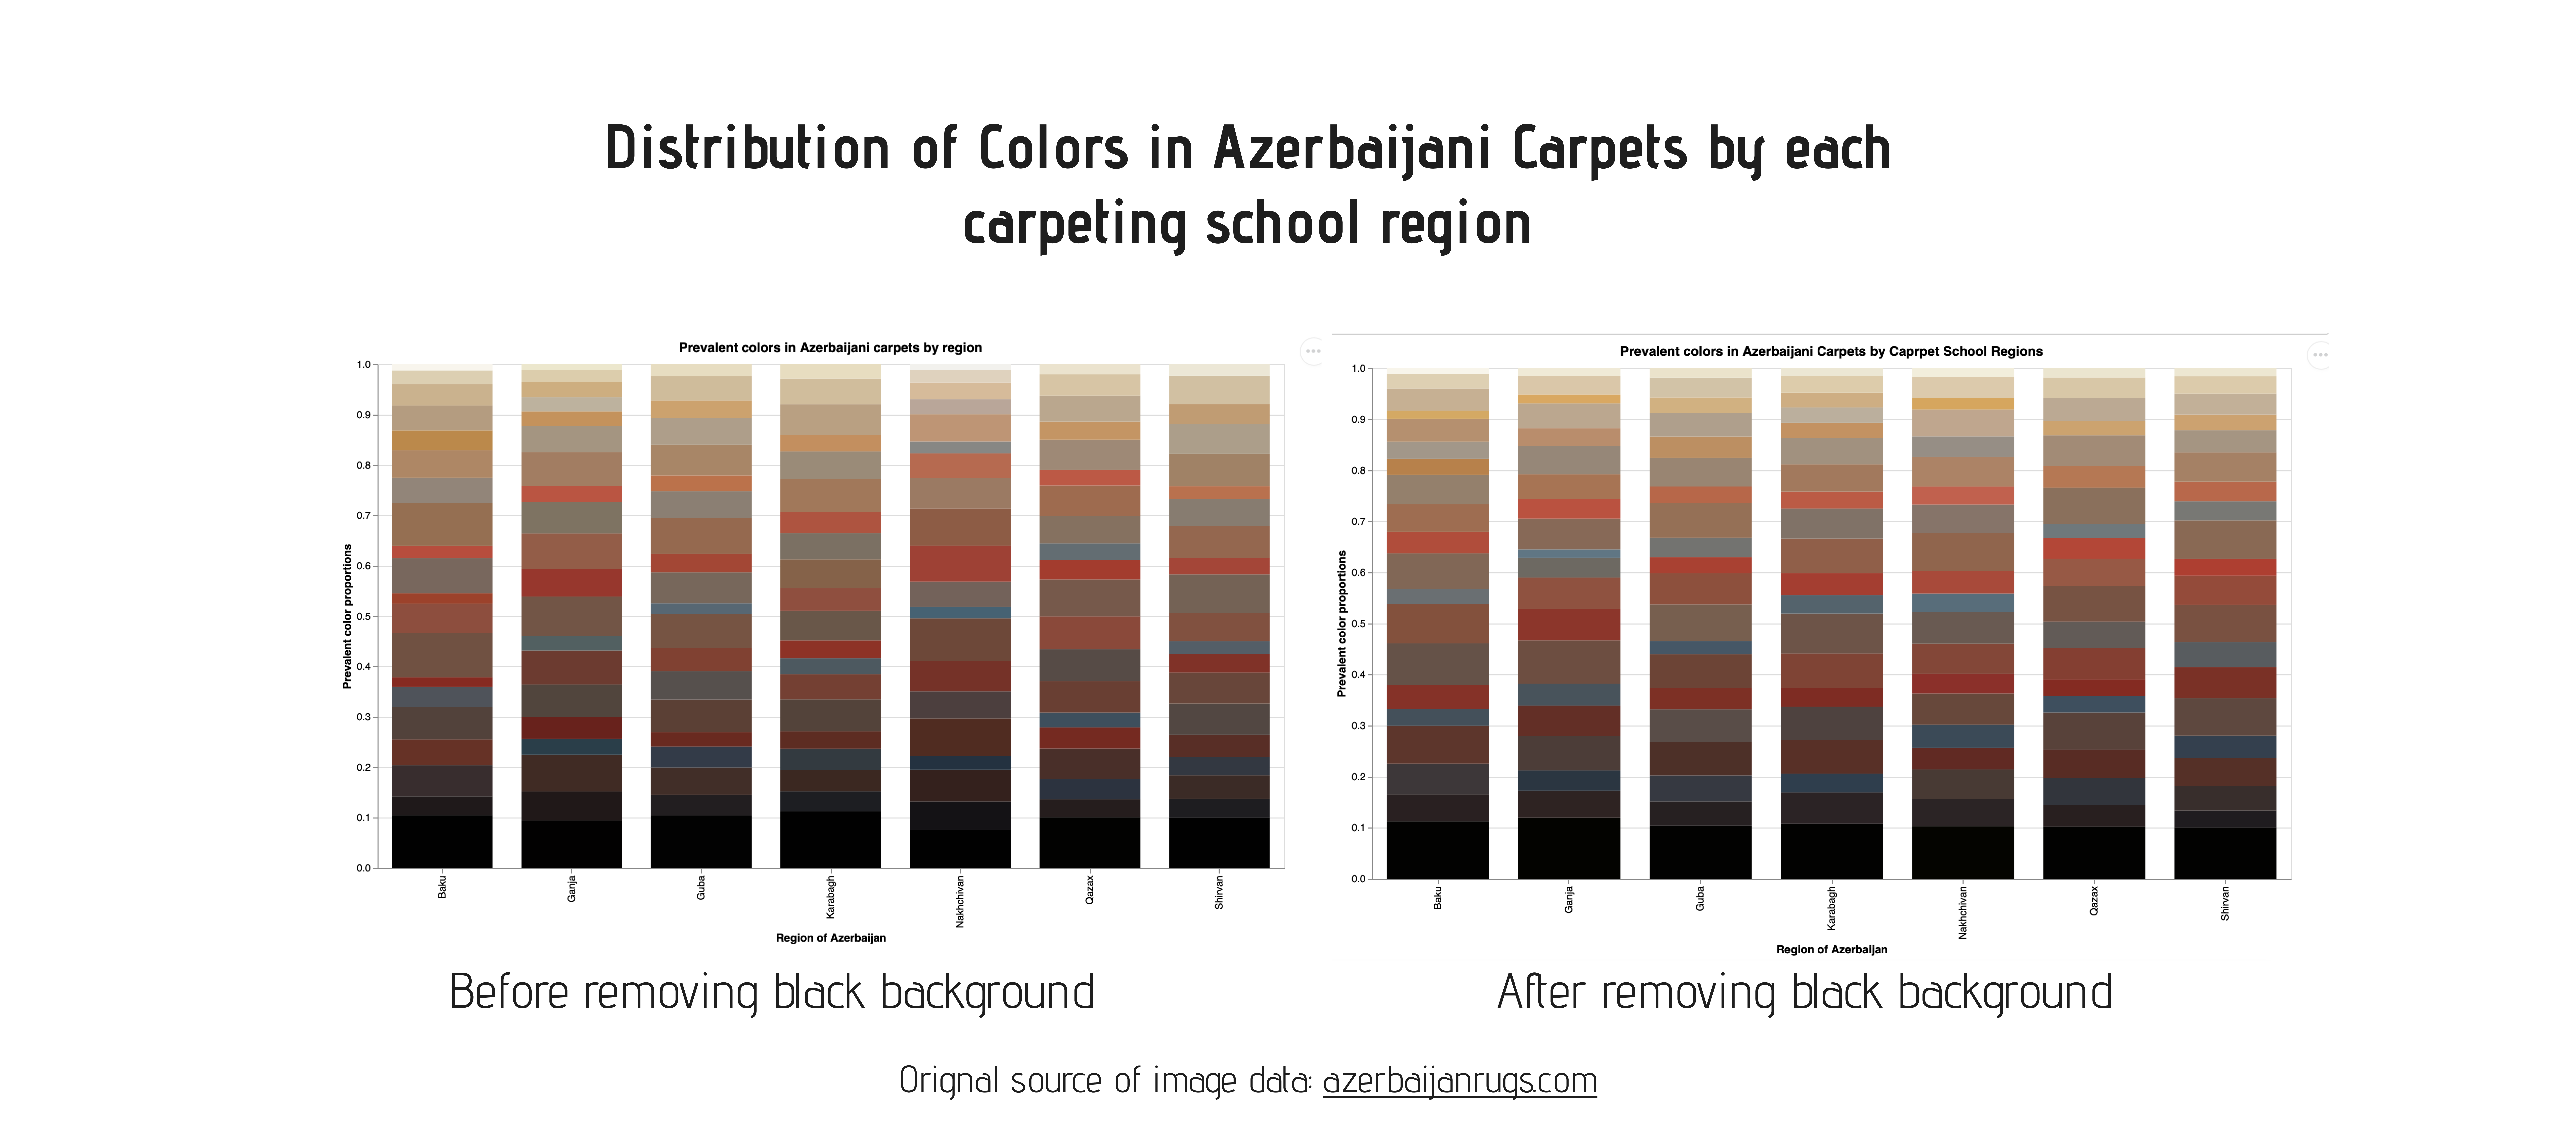

The reveal of new shades of grey/blue colors is even more prevalent if we look at the top 20 dominant colors. We also notice that the shades of red are more intense in the after-result.

Hence, we can conclude that background color was skewing our results, and now we got a more accurate distribution of the colors in Azerbaijani carpets by each region.

# LO appendix

### #dhdocumentation:
Following the previous assignment, I decided to dive into visualizing color distribution. During the last assignment, I started the process and noticed a prevalence of a black background. Hence, in this assignment, I focused on removing this background by manipulating pixel data in my dataset to achieve a more accurate color distribution. I have documented how and what manipulation I'm applying to my dataset. 
To keep this document clean, I have provided a brief rationale behind each decision and attached a link to the process for further exploration if needed. My GitHub repository is public and has documentation for each step I take to allow full replicability of my project. Even though my dataset I too big to showcase here, I have provided examples of before/after results to give an idea of what's happening to the dataset. For my data visualization, I made sure I had a clear axis and title describing my data visualization. Overall, I tried to keep the essential information in this report while ensuring complete transparency in the data collection and processing process. 



### #dh-product:

For this assignment, I focused on delivering a color distribution of Azerbaijani carpets based on the regions. My main goal was to remove any noise which can disturb or skew color distribution. In my image dataset, I noticed most images have black backgrounds, so I removed them to see how they affect the final product. For the form of data visualization, I chose to represent color distribution as tabular stacks summing to 100% in scale from 0 to 1. This form is easy to read as it shows each region and their colors comparatively.
Additionally, I have added a descriptive Title which sums up what the data viz is about to give a brief idea for the viewer without any other context. Lastly, I decided to make a comparative data visualization to clearly show the impact of removing the black background. For this, I put two data visualization next to each to quickly compare two graphs as our brain is used to reading from left to right. 

I have also used the following questions to make sure my data visualization meets the best standards:


1) Is the data source provided? Yes, I have provided the original source. In the context of those data viz, they should be read as a part of the projects where I have provided how exactly those images were gathered and cleaned. 

2) Is the information organized according to the five hat racks?
https://infovis-wiki.net/wiki/Five_Hat_Racks
- category (similarity relatedness) - Yes

- time (chronological sequence - N/A 

- location (geographical or spatial references) - Yes 

- alphabet (alphabetical sequence) -  Yes (regions) 

- continuum (magnitude; highest to lowest, best to worse) - No, the props in the DataViz are automatically determined by my model and are randomly put up. However, they are in the same position across graphs, making comparison easy. 

3) Does the visualization obey the reading gravity? - Yes

4) Are all axes’ directions and shapes proper? - Yes 

5) Is the scale complete (not cut)? - Yes

6) Is there enough axes or value references? - Yes

7) Are all used dimensions necessary? - Yes, I kept the data viz very simple

8) Is the alignment proper? -  Yes

9) Does the visualization utilize the space properly? - Yes, I have plenty of white room, but also do not abuse it

10) Is there not too many labels? - Yes







   

## References




- GitHub - hamidliii/capstone-azerbaijani-carpets: This repository serves as documentation history of my capstone journey and exploration of Azerbaijani carpets. (2022). Retrieved from https://github.com/hamidliii/capstone-azerbaijani-carpets

- Removing Black Background and Make Transparent using Python OpenCV - GeeksforGeeks. (2022). Retrieved from https://www.geeksforgeeks.org/removing-black-background-and-make-transparent-using-python-opencv/
- The painting art colors timeline. (2022). Retrieved from https://www.kaggle.com/code/d22ski/the-painting-art-colors-timeline







